Jesse's Portion: Sports Analysis

Hypotheses:

1. How does the distribution of different sports compare to the distribution of the best players?

2. How has earnings between sports in general compare to the earnings of the top players?

3. How does each sports' number of different ranks contribute to quality of the sport (e.g. earnings)?

## Cleaning up the Data

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [392]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()


,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


## **Hypothesis 1**: How does the distribution of different sports compare to the distribution of the best players?

* Continuing Earnings Analysis of regular players vs. top players by applying concept to sports
* Elaborating on graph made in Individual Players Hypothesis 2 about sport distribution over time

Defining a col name count to groupby

In [393]:
df['count'] = 1
df

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,1
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,1
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,1
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,1
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0,1
...,...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,basketball,2020,74.4,1
297,298,Kevin Durant,USA,7,10,basketball,2020,63.9,1
298,299,Tiger Woods,USA,8,11,golf,2020,62.3,1
299,300,Kirk Cousins,USA,9,>100,american football,2020,60.5,1


Calculate sport average salary which is the average earnings per sport the sum of all different sports

In [394]:
sport_avg_salary = df.groupby(['sport']).agg({'earnings': 'mean', 'count': 'sum'}).reset_index()
sport_avg_salary

,sport,earnings,count
0,american football,53.011765,17
1,baseball,24.085714,7
2,basketball,41.869512,82
3,boxing,49.973913,46
4,cycling,28.000000,1
5,f1,49.615385,13
6,golf,48.556818,44
7,hockey,17.900000,1
8,ice hockey,19.266667,3
9,mma,99.000000,1


rank_1 does the same (average for earnings and sum of sports for all different sports) for rank 1 players

In [395]:
rank_1 = df[df['current_rank']==1]
rank_1_name = rank_1.groupby(['sport']).agg({'earnings':'mean', 'count': 'sum'}).reset_index()
rank_1_name

,sport,earnings,count
0,basketball,48.850000,6
1,boxing,134.157143,7
2,golf,89.763636,11
3,nascar,54.000000,2
4,soccer,102.666667,3
5,tennis,106.300000,1


Average Distribution of Sport Peoples' Pie Chart

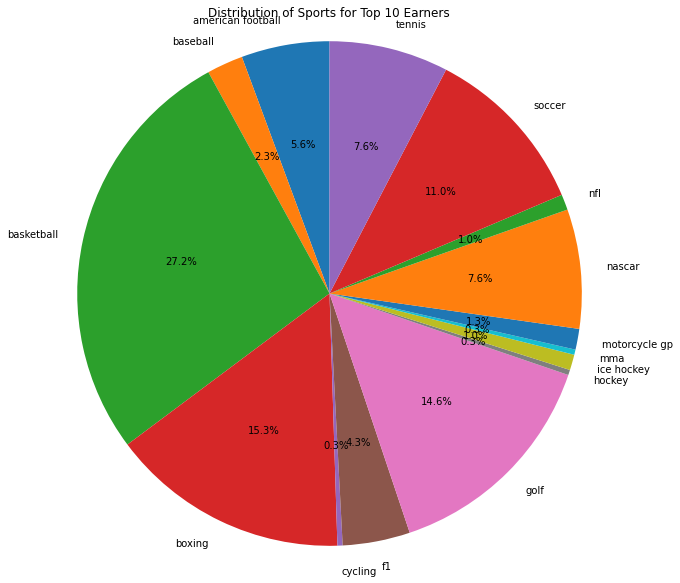

In [396]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sport_avg_salary['count'], labels=sport_avg_salary['sport'] , autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# add title
plt.title('Distribution of Sports for Top 10 Earners')

# show plot
plt.show()

Observations and Analysis:
* basketball is the most dense in our dataset - This means that basketball averages (e.g. for salary) will be more distribution and therefore a more accurate of the current average for earners in top 10
* There are sports with minimal data on relative to other major sports such as: baseball, american football, hockey, and mma - This is important to keep in mind when comparing it with other similarily popular sports as these specifc sports might be particularly skewed in some way
* Lastly, there are obvious less popular sports which would have been assumed to have taken up only a small fraction of the data set such as motorcycle gp and cycling  

Top 1 Earners' Distribution For Sports

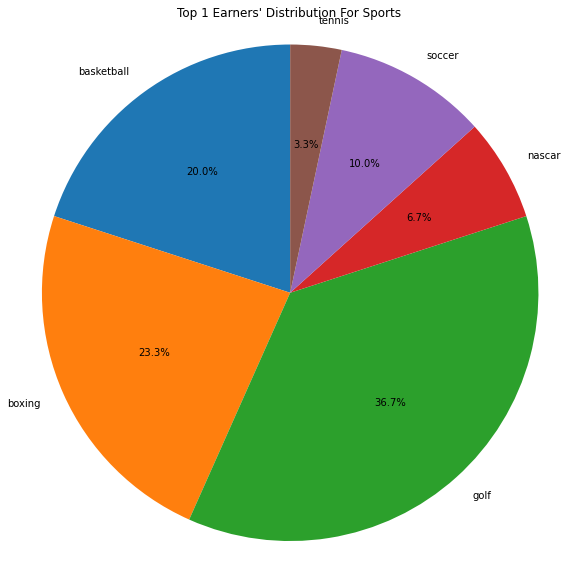

In [397]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(rank_1_name['count'], labels=rank_1_name['sport'] , autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# add title
plt.title('''Top 1 Earners' Distribution For Sports''')

# show plot
plt.show()

Observations and Analysis:
* Golf grew tremendiously compared to the previous graph effectivley saying that a third of the top earners throughout the years came from golf - This leads to predict that golf will have the highest average salary. 
* All other feilds such as boxing, soccer, nascar, tennis, and basketball did not really change thier distribution in the dataset as we narrowed down only to top 1 players

Lets' look at the amount of top earners per sport and by whom 

In [398]:
best_players = df[df['current_rank']==1].groupby(['sport','name']).sum()
best_players = best_players.reset_index()
best_players

,sport,name,s.no,current_rank,year,earnings,count
0,basketball,Michael Jordan,296,6,11969,293.1,6
1,boxing,Evander Holyfield,11,1,1991,60.5,1
2,boxing,Floyd Mayweather,958,4,8059,775.0,4
3,boxing,Mike Tyson,62,2,3986,103.6,2
4,golf,Tiger Woods,1791,11,22078,987.4,11
5,nascar,Michael Schumacher,192,2,3999,108.0,2
6,soccer,Cristiano Ronaldo,514,2,4033,181.0,2
7,soccer,Lionel Messi,282,1,2019,127.0,1
8,tennis,Roger Federer,292,1,2020,106.3,1


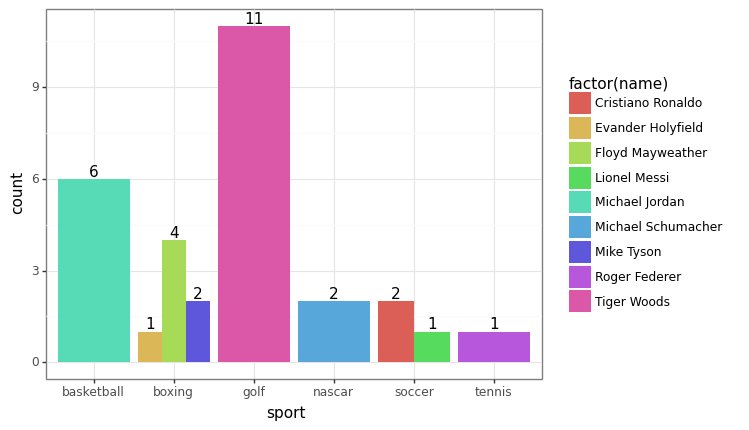

<ggplot: (121910131996)>

In [399]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=best_players, mapping=aes(x="sport",y='count', fill="factor(name)"))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label='count'),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.0f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+

 
theme_bw())

Analysis and Observation:
* Wow! It seems that there only one star player in golf that is pulling up the distribtion to 30%.
* This is the same with basketball
* most of the other sports have few and far between top earners 
* This may mean that this person, Tiger Woods, is paid very well for what he does - however we cannot make generalizations about the sport itself

Observations:
* Probibley would be better to compare both top and not top tier players with only bottom in order not to have such as small sample size

In [425]:
sport_avg_salary_without_rank_1 = df[df.current_rank!=1]
sport_avg_salary_without_rank_1 = sport_avg_salary_without_rank_1.groupby(['sport']).agg({'earnings': 'mean', 'count': 'sum'}).reset_index()
sport_avg_salary_without_rank_1

,sport,earnings,count
0,american football,53.011765,17
1,baseball,24.085714,7
2,basketball,41.318421,76
3,boxing,34.864103,39
4,cycling,28.000000,1
5,f1,49.615385,13
6,golf,34.821212,33
7,hockey,17.900000,1
8,ice hockey,19.266667,3
9,mma,99.000000,1


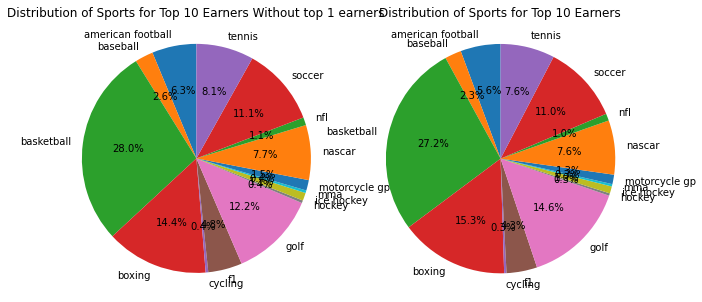

In [426]:

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(10, 5))

# Create the first pie chart
ax1.pie(sport_avg_salary_without_rank_1['count'], labels=sport_avg_salary_without_rank_1['sport'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Distribution of Sports for Top 10 Earners Without top 1 earners')

# Create the second pie chart
ax2.pie(sport_avg_salary['count'], labels=sport_avg_salary['sport'], autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Distribution of Sports for Top 10 Earners')

# Display the plots
plt.show()

Observations:
* Nevermind the top 1 players make up a very small percentage of the actual data

## ***Hypothesis 2***: How has earnings between sports in general compare to the earnings of the top players? 

* Adding onto previous work done in hypothesis 2 of earnings

In [427]:
# adding column called best to seperate rank 1 from not rank 1 when concatenating both
rank_1_name['best']='Yes'
sport_avg_salary['best']='No'
best_and_not_best = pd.concat([rank_1_name, sport_avg_salary])
best_and_not_best

,sport,earnings,count,best
0,basketball,48.850000,6,Yes
1,boxing,134.157143,7,Yes
2,golf,89.763636,11,Yes
3,nascar,54.000000,2,Yes
4,soccer,102.666667,3,Yes
5,tennis,106.300000,1,Yes
0,american football,53.011765,17,No
1,baseball,24.085714,7,No
2,basketball,41.869512,82,No
3,boxing,49.973913,46,No


In [428]:
# dont need count for this analysis
best_and_not_best = best_and_not_best.drop('count',axis=1)

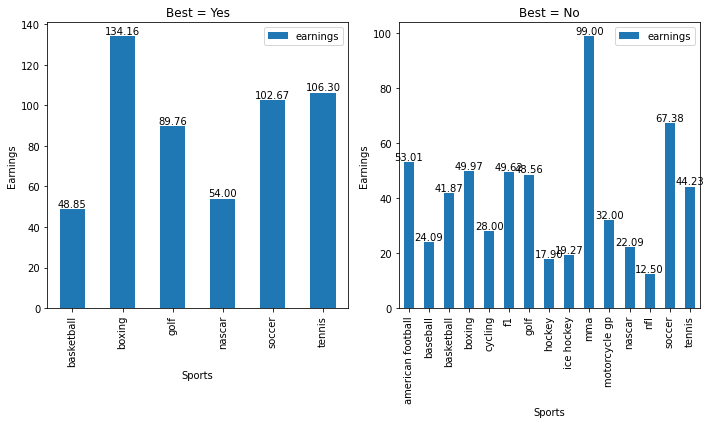

In [429]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
best_and_not_best[best_and_not_best['best'] == 'Yes'].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
best_and_not_best[best_and_not_best['best'] == 'No'].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Best = Yes')
axes[1].set_title('Best = No')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()


Let's Narrow it only to relevant sports

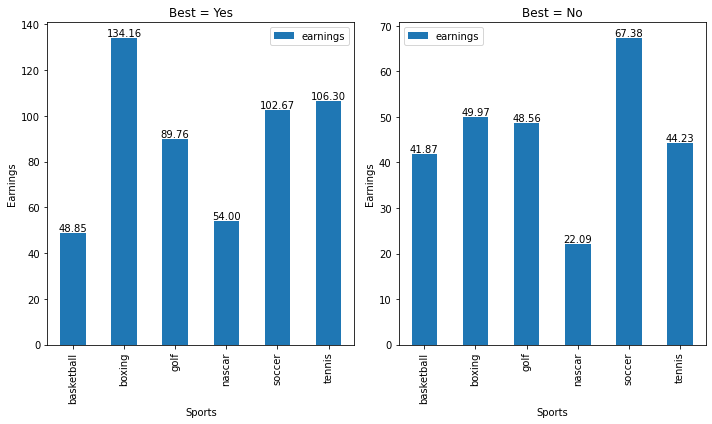

In [437]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
best_and_not_best[(best_and_not_best['best'] == 'Yes')].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
best_and_not_best[(best_and_not_best['best'] == 'No')&(best_and_not_best.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis']))].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Best = Yes')
axes[1].set_title('Best = No')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()


Observations and Analysis
* Baketball: Increase in Avg. Salary from 41 to 48 for top 1 earners not so much increase
* Boxing: Crazy increase! boxing increased its average from around two to three times its orginal salary! 50 to 135. However (see above) there wasnt an insane increase in a distribution of top earners. This suggests that few inidviduals get paid very handsomely in boxing!
* Golf increased considerably 
* This is interesing it seems that mma is way higher in salaries.

* Not equal so the sports with less representation will are less accurate for a mean. For example, it can be possible that mma fighting might be less accurate than basketball given the fact that there is a significanltly less representation from mma. This can possibly scew the number as seen above

Still seems skewed because of the fact that there are few top player so compare avg. salaries with and without the top tier players

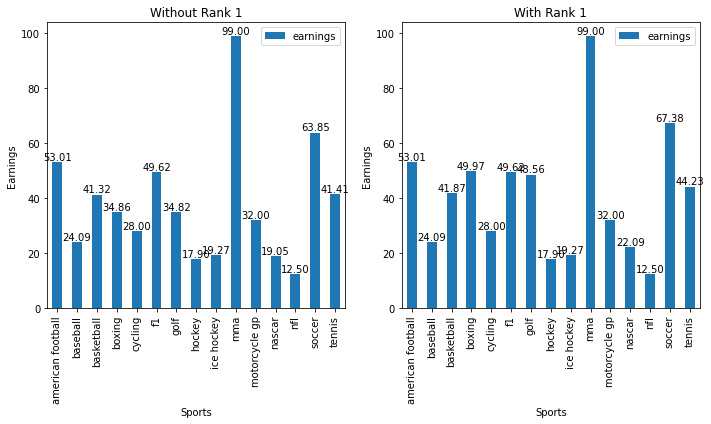

In [430]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
sport_avg_salary_without_rank_1.plot(kind='bar', x='sport', y='earnings', ax=axes[0])
sport_avg_salary.plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Without Rank 1')
axes[1].set_title('With Rank 1')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()

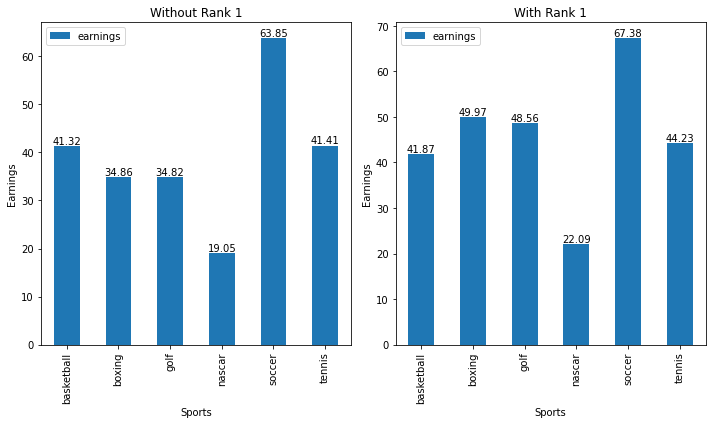

In [440]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
sport_avg_salary_without_rank_1[sport_avg_salary_without_rank_1.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis'])].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
sport_avg_salary[sport_avg_salary.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis'])].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Without Rank 1')
axes[1].set_title('With Rank 1')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()

## Hypothesis 3: How does each sports' number of different ranks contribute to quality of the sport (e.g. earnings)?

In [272]:
rank_df = df.groupby(['current_rank']).sum()
rank_df = rank_df.reset_index()

In [277]:
rank_df[['count']]

,count
0,30
1,32
2,30
3,28
4,32
5,32
6,28
7,30
8,34
9,25


Text(0.5, 1.0, 'Rank')

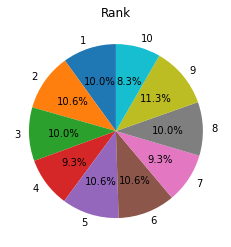

In [278]:
fig, ax = plt.subplots()
ax.pie(rank_df['count'], labels=rank_df['current_rank'], autopct='%1.1f%%', startangle=90)
ax.set_title('Rank')

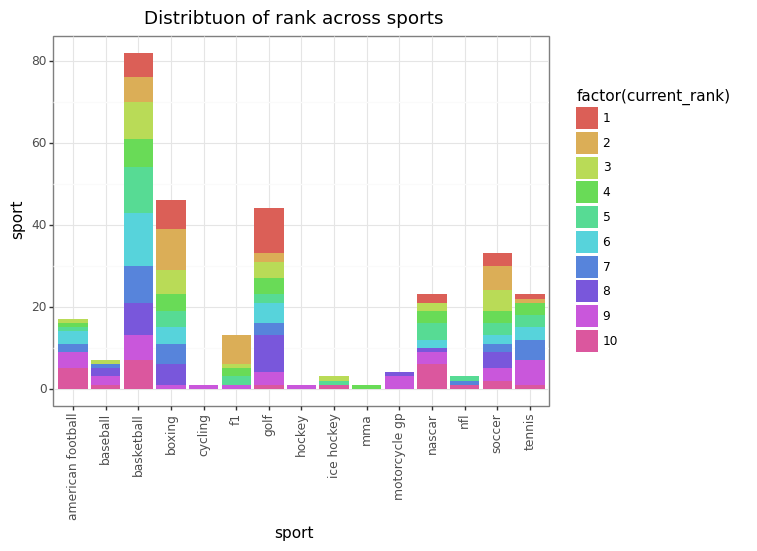

<ggplot: (121901586911)>

In [280]:
(ggplot(data=df, mapping=aes(x="sport", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Distribtuon of rank across sports")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

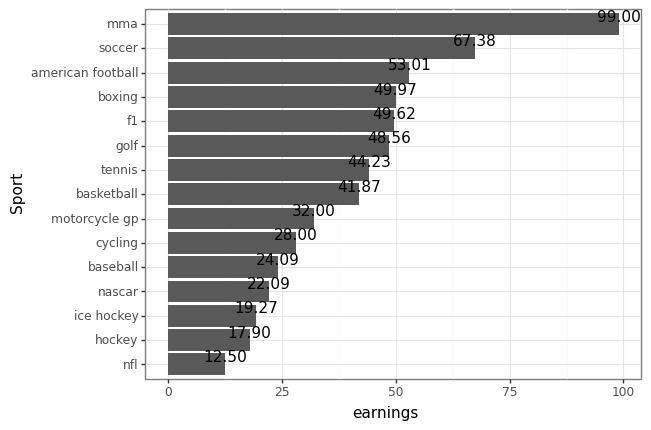

<ggplot: (121898586239)>

In [281]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=sport_avg_salary, mapping=aes(x="reorder(sport, earnings)",y='earnings'))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="earnings"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+coord_flip()+xlab('Sport')+

 
theme_bw())

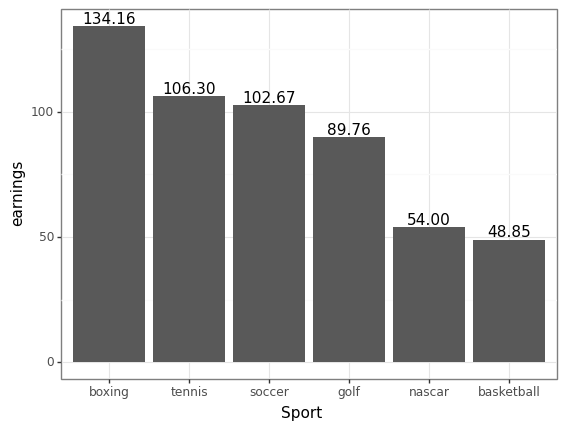

<ggplot: (121898964770)>

In [283]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=rank_1_name, mapping=aes(x="reorder(sport,-earnings)",y='earnings'))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="earnings"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+xlab('Sport')+

 
theme_bw())

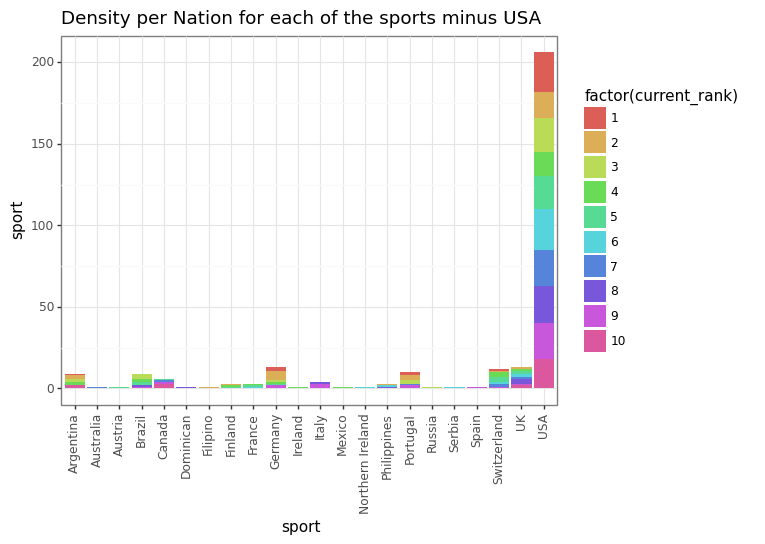

<ggplot: (121896978914)>

In [282]:
(ggplot(data=df, mapping=aes(x="nationality", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

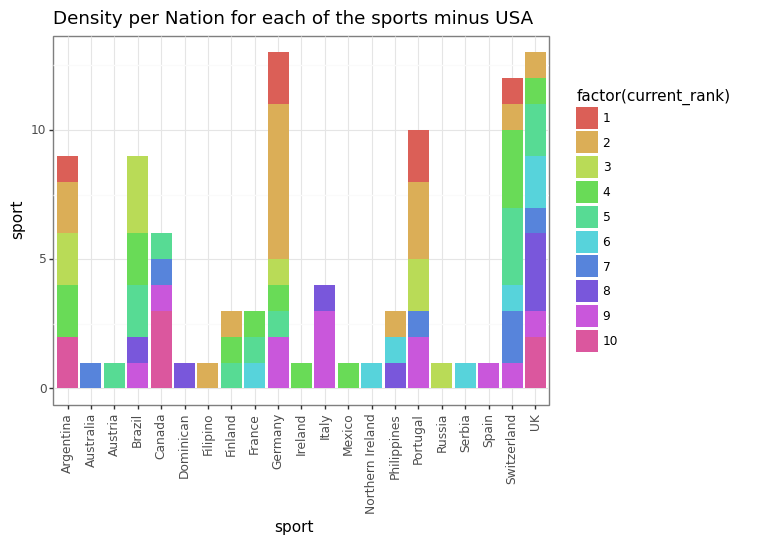

<ggplot: (121897636949)>

In [284]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x="nationality", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

Compare this with Nathans Graphs for Total Earnings by Nation with and without the UNited States! can see a pattern!

In [289]:
df

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,1
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,1
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,1
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,1
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0,1
...,...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,basketball,2020,74.4,1
297,298,Kevin Durant,USA,7,10,basketball,2020,63.9,1
298,299,Tiger Woods,USA,8,11,golf,2020,62.3,1
299,300,Kirk Cousins,USA,9,>100,american football,2020,60.5,1


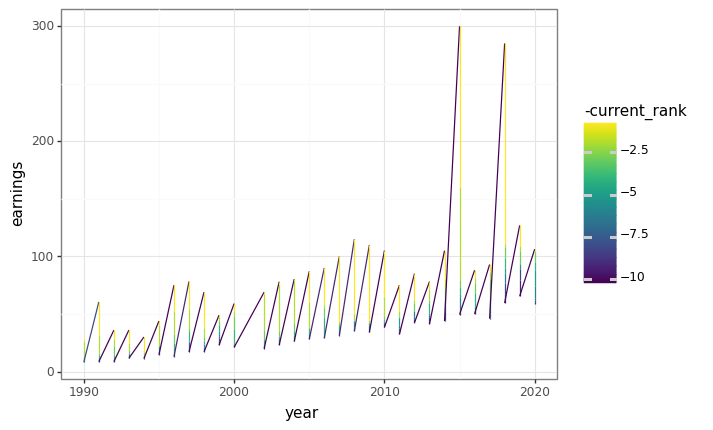

<ggplot: (121906178844)>

In [316]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='-current_rank'))+
 geom_line()+
 theme_bw())


The reason why in nathans graph United States has been going up and down was because the current rank is falling after every interval

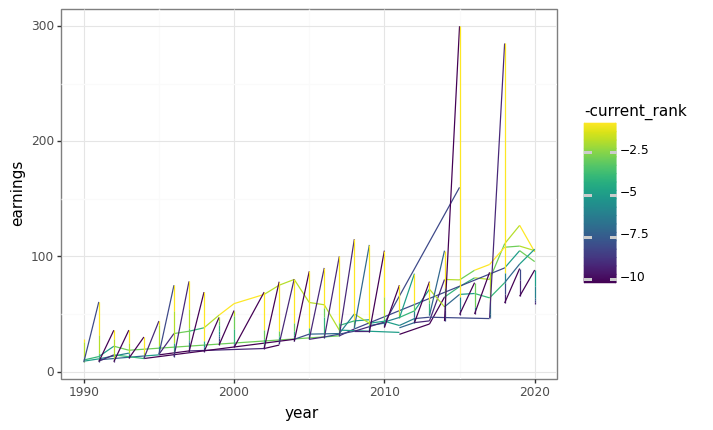

<ggplot: (121899782437)>

In [318]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='-current_rank', group = 'nationality'))+
 geom_line()+
 theme_bw())


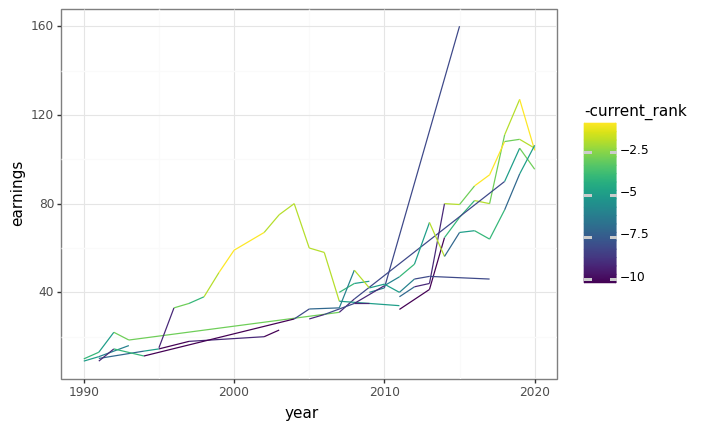

<ggplot: (121898960713)>

In [443]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x='year', y='earnings', color='-current_rank', group = 'nationality'))+
 geom_line()+
 theme_bw())


What happened in 2000! It was rising but he stunk!

In [444]:
df[df['earnings']==80]

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
132,133,Michael Schumacher,Germany,2,2,f1,2004,80.0,1
232,233,Cristiano Ronaldo,Portugal,2,9,soccer,2014,80.0,1
263,264,Lionel Messi,Argentina,3,2,soccer,2017,80.0,1


earning skyrocket after a current rank increases!

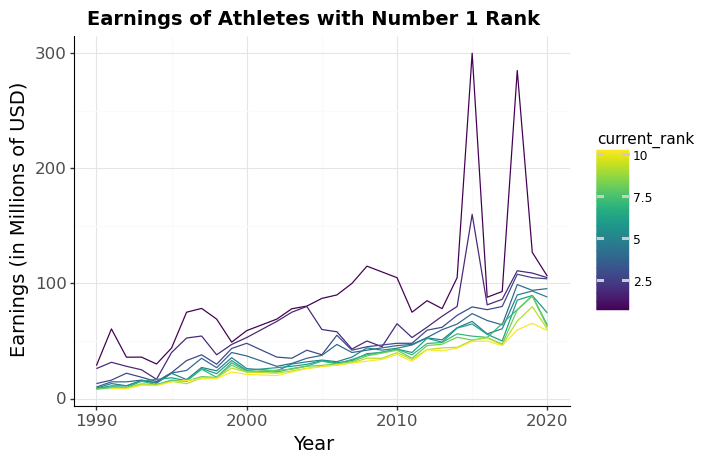

<ggplot: (121906279400)>

In [312]:
(ggplot(df, aes(x='year', y='earnings',group = 'current_rank'))
 + geom_line(aes(x='year',y='earnings',color = 'current_rank'))
 + labs(title='Earnings of Athletes with Number 1 Rank', x='Year', y='Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [ ]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years
reg2_top1earnings = smf.ols('earnings~year',df_no1).fit() 
reg2_top1earnings.summary()
# Try using linear fregressions for all cartegorical varaibles

Run Linarear regression on sports vs. earings with current rnak

In [256]:
ax.pie(rank_df, labels=labels, autopct='%1.1f%%', startangle=90)

,sport,current_rank,s.no,year,earnings,count
0,american football,3,134,2004,42.0,1
1,american football,4,145,2005,37.5,1
2,american football,5,226,2013,51.0,1
3,american football,6,781,6049,188.5,3
4,american football,7,546,4035,142.4,2
...,...,...,...,...,...,...
78,tennis,5,748,6046,213.1,3
79,tennis,6,480,6018,109.8,3
80,tennis,7,778,10027,192.8,5
81,tennis,9,668,12004,136.5,6


Hypothesis 3: What will a regression show about the relationship between the sports and earnings 

Redoing Regression Previously tried in Invidiual characters Hypothesis one